# Analisi Esplorativa delle variabili temporali

### Claudia Gabriela Ochoa Martinez (2020)

#### Effettuiamo una prima analisi esplorativa sulle variabili ambientali, che ci possono fornire informazioni sulla frequenza delle cattuare in base le variabili ambientali. 
#### 

In [1]:
library(gplots)
library(lattice)
library(tidyverse)



Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
#### Inserire l'anno su cui si vuole effettuare l'analisi es. =="2014", "2015", ecc
anno_analisi <- "2018"
sessione_analisi <- "1"

In [30]:
# Matrice di detection history (catture effettive) -- y
catture_effettive <- read.csv("Dati-preparazione-modello\\catture_effettive_totale.csv", dec=",", sep=";", header = TRUE)

# Leggiamo le matrici dell'Orario (Alba Tramonto), Precipitazioni e Temperatura -- ObsCovs
orario_occasione <- read.csv("Dati-preparazione-modello\\orario_occasione_totale.csv", dec=",", sep=";", header = TRUE, stringsAsFactors = FALSE)
precipitazioni_occasione <- read.csv("Dati-preparazione-modello\\precipitazioni_occasione_totale.csv", dec=",", sep=";", header = TRUE, stringsAsFactors = FALSE)
temperatura_occasione <- read.csv("Dati-preparazione-modello\\temperatura_occasione_totale.csv", dec=",", sep=";", header = TRUE, stringsAsFactors = FALSE)
velvento_occasione <- read.csv("Dati-preparazione-modello\\velvento_occasione_totale.csv", dec=",", sep=";", header = TRUE, stringsAsFactors = FALSE)

# Prendiamo Datioccas per legare l'anno alle varie osservazioni
Datioccas <- read.csv("Dati-elaborati/Dati-occasioni.csv", dec=",", sep=";", header = TRUE)

righe_oggetto_analisi <- c(1:ncol(velvento_occasione))

In [31]:
# # Ricaviamo le colonne oggetto di analisi
# if (exists("sessione_analisi")) {
#     righe_oggetto_analisi <- rownames(subset(Datioccas,Anno == anno_analisi & sessione == sessione_analisi))
# } else {
#     righe_oggetto_analisi <- rownames(subset(Datioccas,Anno == anno_analisi))
# }
# righe_oggetto_analisi <- as.numeric(righe_oggetto_analisi)
# righe_oggetto_analisi

In [39]:
catture_effettive_ <- data.frame(colSums(catture_effettive))[righe_oggetto_analisi,]

orario_occasione_ <- data.frame(t(orario_occasione[1,righe_oggetto_analisi]))
precipitazioni_occasione_ <- data.frame(t(precipitazioni_occasione[1,righe_oggetto_analisi]))
temperatura_occasione_ <- data.frame(t(temperatura_occasione[1,righe_oggetto_analisi]))
velvento_occasione_ <- data.frame(t(velvento_occasione[1,righe_oggetto_analisi]))
velvento_occasione_round <- round( data.frame(t(velvento_occasione[1,righe_oggetto_analisi])))
temperatura_occasione_round <-round( data.frame(t(temperatura_occasione[1,righe_oggetto_analisi])))
precipitazioni_occasione_round <- ceiling(data.frame(t(precipitazioni_occasione[1,righe_oggetto_analisi])))

df <- cbind(catture_effettive_, orario_occasione_, precipitazioni_occasione_, temperatura_occasione_, velvento_occasione_,temperatura_occasione_round,velvento_occasione_round, precipitazioni_occasione_round)
colnames(df) <- c("Catture.Singola.Occas","Orario","Precip","Temp","Velocita.Vento","Temp.Arrotond","Velocita.Vento.Arrot","Precip.Arrot")
df$ID <- seq.int(nrow(df))
head(df)

,Catture.Singola.Occas,Orario,Precip,Temp,Velocita.Vento,Temp.Arrotond,Velocita.Vento.Arrot,Precip.Arrot,ID
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
orario.1,0,Al,0,9.6,3.0,10,3,0,1
orario.2,0,Tr,0,4.5,1.4,4,1,0,2
orario.3,0,Al,0,7.7,2.9,8,3,0,3
orario.4,0,Tr,0,9.5,1.2,10,1,0,4
orario.5,0,Al,0,10.1,2.4,10,2,0,5
orario.6,0,Tr,0,5.6,0.9,6,1,0,6


### Scatterplot matrix ottimo modo per stabilire se visivamente se c'è una correlazione lineare tra le variabili

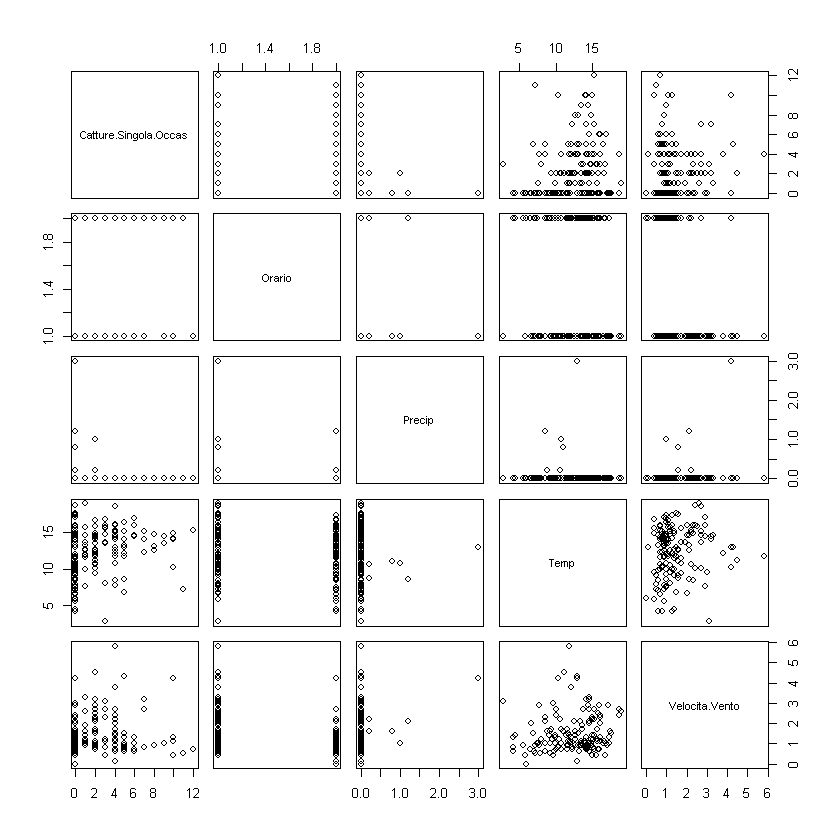

In [40]:
plot(df[,c("Catture.Singola.Occas","Orario","Precip","Temp","Velocita.Vento")])

#### boxplot per Alba e Tramonto, si può notare che vi sono più catture al tramonto

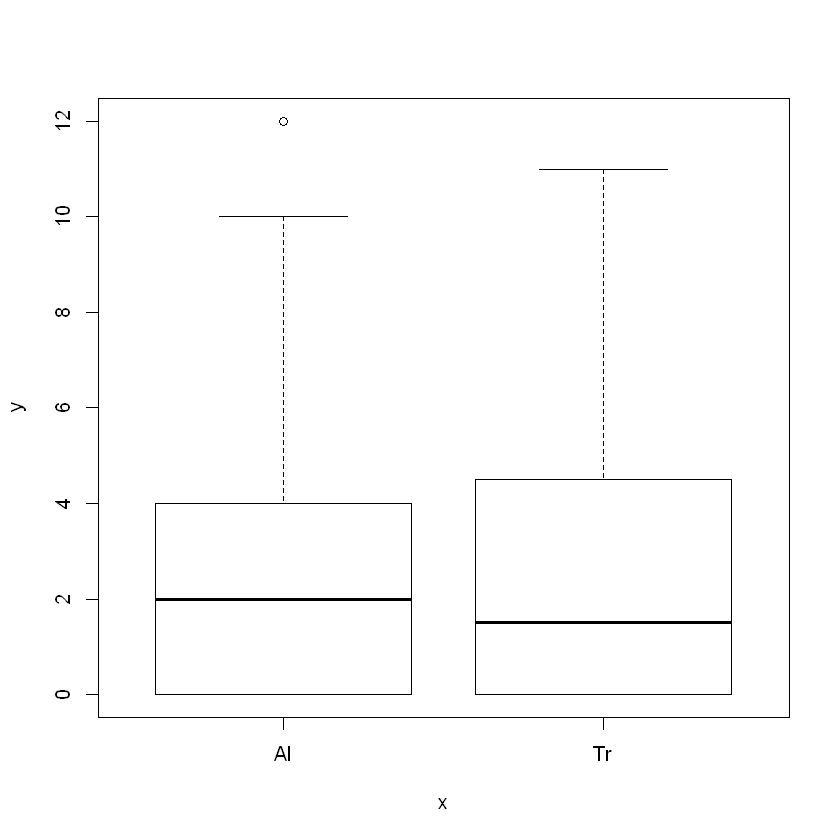

In [41]:
plot(df$Orario,df$Catture.Singola.Occas)

#### Abbiamo voluto verificare la frequenza di cattura in base le temperature lungo negli anni. Infatti possiamo notare che si verificano più catture quando la temperatura aumenta fino ai 15°.

`summarise()` ungrouping output (override with `.groups` argument)



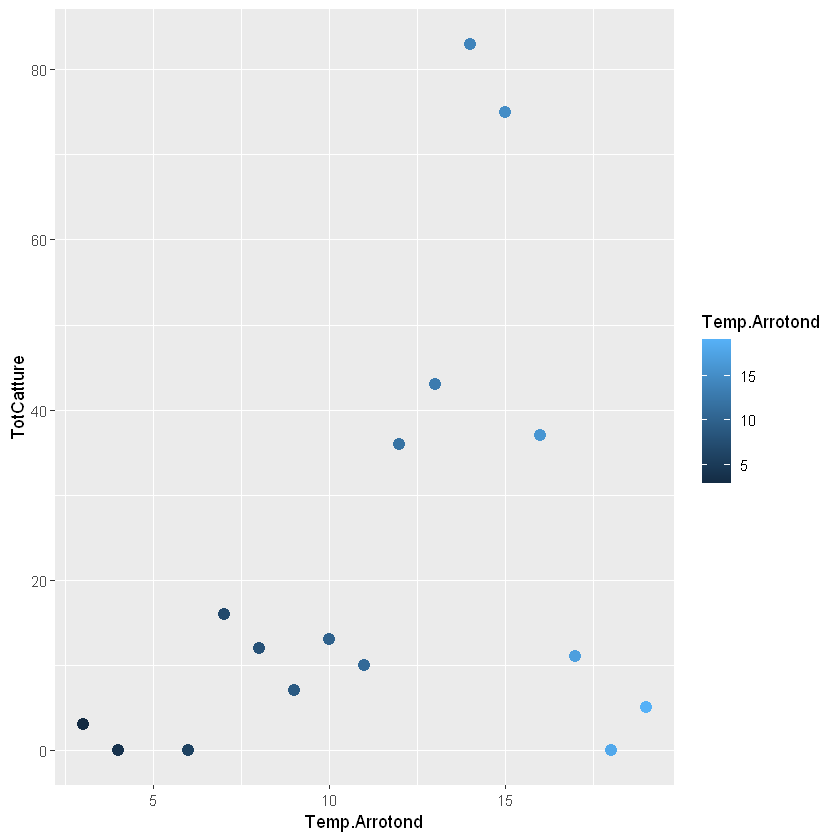

In [42]:
df %>%
select(Temp.Arrotond,Catture.Singola.Occas) %>%
group_by(Temp.Arrotond) %>%
summarise(TotCatture = sum(Catture.Singola.Occas)) %>%
ggplot(aes(Temp.Arrotond,TotCatture) )+ geom_point(aes(colour = Temp.Arrotond), size=3)

#### Si sono anche verificate più catture quando la velocità del vento è minore

`summarise()` ungrouping output (override with `.groups` argument)



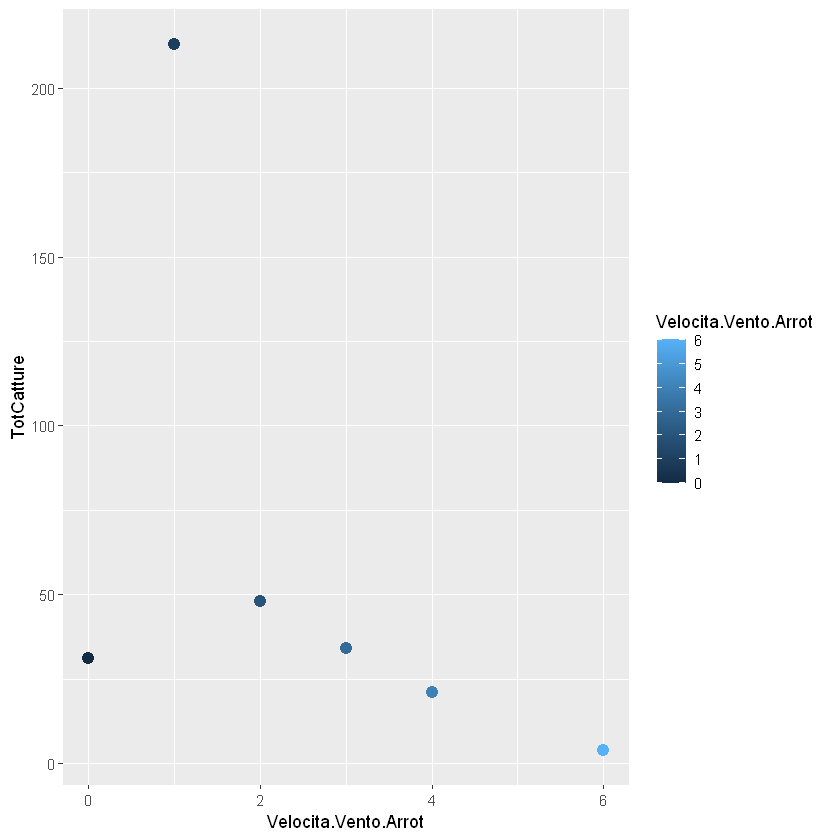

In [43]:
df %>%
select(Velocita.Vento.Arrot,Catture.Singola.Occas) %>%
group_by(Velocita.Vento.Arrot) %>%
summarise(TotCatture = sum(Catture.Singola.Occas)) %>%
ggplot(aes(Velocita.Vento.Arrot,TotCatture) )+ geom_point(aes(colour = Velocita.Vento.Arrot), size=3)

#### Si verificano anche più catture quando non ci sono precipitazioni

`summarise()` ungrouping output (override with `.groups` argument)



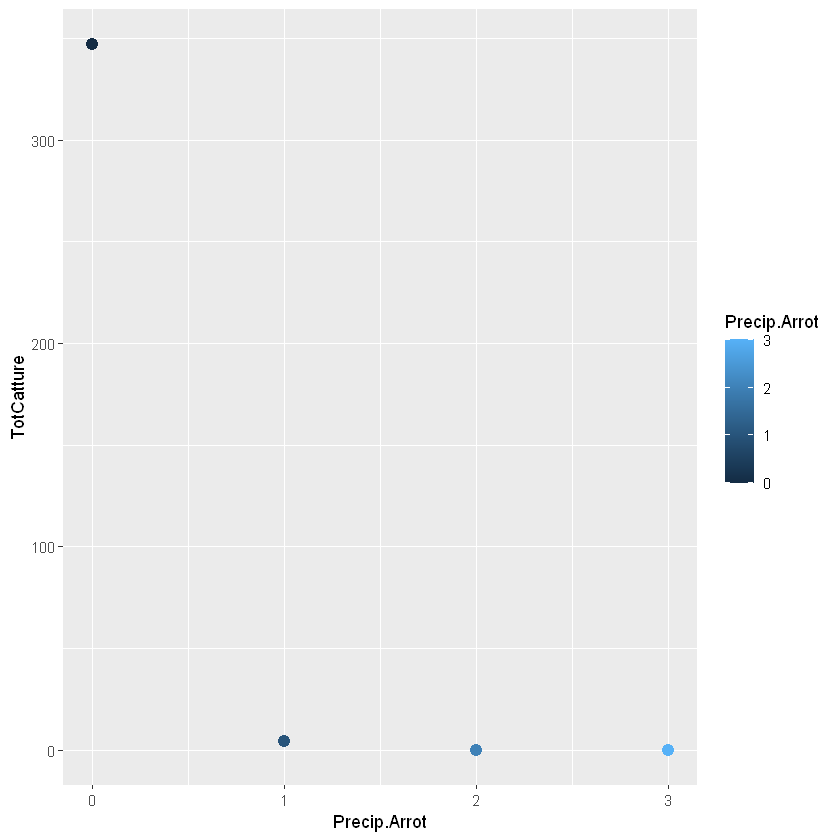

In [44]:
df %>%
select(Precip.Arrot,Catture.Singola.Occas) %>%
group_by(Precip.Arrot) %>%
summarise(TotCatture = sum(Catture.Singola.Occas)) %>%
ggplot(aes(Precip.Arrot,TotCatture) )+ geom_point(aes(colour = Precip.Arrot), size=3)